In [55]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from PIL import Image
import matplotlib.pyplot as plt

import torchvision.transforms as transforms
import torchvision.models as models

import copy

from visualization.modules import Normalization
from visualization.style_transfer import *

In [56]:
from pathlib import Path
from fastai.basic_train import load_learner

In [57]:
model_path = Path("/home/jupyter/models/")
output_path = Path("home/jupyter/data/style_transfers")

In [58]:
learner = load_learner(path = model_path, file = "vgg19_age_2.pkl")

In [59]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [60]:
cnn = learner.model[0][0]

In [64]:
# desired size of the output image
imsize = 512 if torch.cuda.is_available() else 128  # use small size if no gpu

loader = transforms.Compose([
    transforms.Resize(imsize),  # scale imported image
    transforms.ToTensor()])  # transform it into a torch tensor

def image_loader(image_name):
    image = Image.open(image_name)
    # fake batch dimension required to fit network's input dimensions
    image = loader(image).unsqueeze(0)
    return image.to(device, torch.float)


In [67]:
content_img = image_loader("/home/jupyter/data/" + "markus_pp.jpg")
style_img = image_loader("/home/jupyter/data/" + "hendrix.jpg")

style_img = style_img[:, :3, :, :512]
content_img.shape
assert style_img.size() == content_img.size(), \
    "we need to import style and content images of the same size"

In [68]:
style_injects = [f'conv-{i}' for i in range(12)]
content_injects = ['conv-3', "conv-4", "conv-5"]

In [71]:
cnn_normalization_mean = torch.tensor([0.485, 0.456, 0.406]).to(device)
cnn_normalization_std = torch.tensor([0.229, 0.224, 0.225]).to(device)
arch = LayeredModule.from_cnn(cnn, Normalization(cnn_normalization_mean, cnn_normalization_std).to(device))

/home/jupyter/vision-playground/nbs/playground/visualization/modules.py:89: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.mean = torch.tensor(mean).view(-1, 1, 1)
/home/jupyter/vision-playground/nbs/playground/visualization/modules.py:90: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.std = torch.tensor(std).view(-1, 1, 1)


In [72]:
style_module = StyleTransferModule(arch, content_img, content_injects, style_img, style_injects)

In [77]:
unloader = transforms.ToPILImage()  # reconvert into PIL image
plt.ion()
def imshow(tensor, ax=None, title=None):
    image = tensor.cpu().clone()  # we clone the tensor to not do changes on it
    image = image.squeeze(0)      # remove the fake batch dimension
    image = unloader(image)
    if ax is None:
        ax = plt
        title_setter = plt.title
    else:
        title_setter = ax.set_title
    ax.imshow(image)
    ax.axis('off')
    if title is not None:
        title_setter(title)
    #plt.pause(0.001) # pause a bit so that plots are updated


(None, torch.Size([1, 3, 512, 512]))

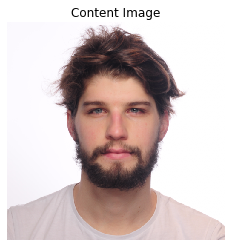

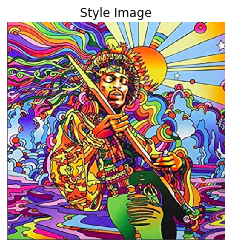

In [78]:
plt.figure()
imshow(content_img, title='Content Image')
plt.figure()
imshow(style_img, title='Style Image'), style_img.shape

Optimizing...
run [50]:
Style Loss : 22756.734375 Content Loss: 474.086304

run [100]:
Style Loss : 5868.494629 Content Loss: 487.387146

run [150]:
Style Loss : 3253.803711 Content Loss: 492.469177

run [200]:
Style Loss : 2093.200928 Content Loss: 492.111267

run [250]:
Style Loss : 1492.875610 Content Loss: 496.003967

run [300]:
Style Loss : 1303.809326 Content Loss: 494.704163



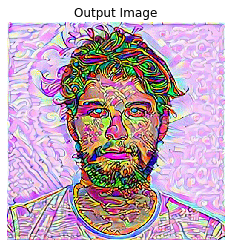

In [80]:
input_img = content_img.clone()
#output = style_module.run_style_transfer(input_img, num_steps=300, tv_weight=0.001 )

plt.figure()
imshow(output, title='Output Image')

# sphinx_gallery_thumbnail_number = 4
plt.ioff()
plt.show()

In [137]:
#encode in strings
#import trained model
#run style transfer with config
#save input, output
#save config as JSON
#callback for 'run style transfer'


#vgg19_age_2.pkl
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_path = Path("/home/jupyter/models/")



style_img = style_img[:, :3, :, :512]


batch_config = {
    #all relations and tweaking is assumed a cartesian product of params
    "model": "vgg19_age_2.pkl", #TODO: model_meta: information about models trained...
    
    "style_content_pairs": [ #can run multiple pair
        ("/home/jupyter/data/" + "hendrix.jpg", 
         "/home/jupyter/data/" + "markus_pp.jpg"
         )
    ],
    "style_transfer_optim_v": 0.1,
    "style_injects": [[f'conv-{i}' for i in range(12)]],
    "content_injects": ["content_5"], #doesn't really make a difference
    "epochs": 300,
    "save_every_x_epoch": 50, #non-linear might be better
    "tv_weights": 0.001,

}

params = {
     #"losses" : [{epoch: 50, result_file: "epoch_50", content_loss: 55, style_loss: 411}]
}
#markus_1
#    markus_1_epoch_100
#    markus_1_epoch_200
#    markus_1_config.json


In [135]:
folder_name= "try"
for s in [f'conv-{i}' for i in range(12)]:
    print(str(s.split("-")[1]))
    folder_name += "-" + s.split("-")[1]

0
1
2
3
4
5
6
7
8
9
10
11


In [136]:
folder_name

'try-0-1-2-3-4-5-6-7-8-9-10-11'

In [107]:
jsonpickle.encode(obj)

NameError: name 'jsonpickle' is not defined

In [111]:
#!pip install -U jsonpickle
#jsonpickle.encode()
json.loads(json.dumps(batch_config, default=lambda o: o.__dict__, indent=4))

{'model': 'vgg19_age_2.pkl',
 'style_content_pairs': [['/home/jupyter/data/hendrix.jpg',
   '/home/jupyter/data/markus_pp.jpg']],
 'style_transfer_optim_v': 0.1,
 'style_injects': ['conv-0',
  'conv-1',
  'conv-2',
  'conv-3',
  'conv-4',
  'conv-5',
  'conv-6',
  'conv-7',
  'conv-8',
  'conv-9',
  'conv-10',
  'conv-11'],
 'content_injects': ['content_5'],
 'epochs': 300,
 'save_every_x_epoch': 50,
 'tv_weights': 0.001}

In [81]:
a ,b =   [ #can run multiple pair
        ("/home/jupyter/data/" + "markus_pp.jpg", 
         "/home/jupyter/data/" + "hendrix.jpg/")
    ][0]

In [82]:
a, b

('/home/jupyter/data/markus_pp.jpg/', '/home/jupyter/data/hendrix.jpg/')

In [99]:
import json

r = {'is_claimed': 'True', 'rating': 3.5}
r = json.dumps(r)

In [113]:
x = style_img
image = x.cpu().clone()  # we clone the tensor to not do changes on it
image = image.squeeze(0)      # remove the fake batch dimension
image = unloader(image)
image.save("/home/jupyter/data/style_transfers/hendrix_yo.jpg", 'JPEG')

In [98]:
p = pathlib.Path("/home/jupyter/data/style_transfers/")
p.mkdir(parents=True, exist_ok=True)
fn = "config.txt" # I don't know what is your fn
filepath = p / fn
with filepath.open("w", encoding ="utf-8") as f:
    f.write("yolo")

In [149]:
from datetime import datetime


In [150]:
SK = 4

In [154]:
#add %timer to params -- know how long the training took
def hyperparam_traverse(config, model_path="/home/jupyter/models/", output_path="home/jupyter/data/style_transfers/"):
   
    #SETUP ARCH
    learner = load_learner(path = model_path, file = "vgg19_age_2.pkl")
    cnn = learner.model[0][0]
    cnn_normalization_mean = torch.tensor([0.485, 0.456, 0.406]).to(device)
    cnn_normalization_std = torch.tensor([0.229, 0.224, 0.225]).to(device)
    arch = LayeredModule.from_cnn(cnn, Normalization(cnn_normalization_mean, cnn_normalization_std).to(device))
    
    #iteration logic later
    style_p, content_p = config["style_content_pairs"][0]
    style_img = image_loader(style_p)
    style_img = style_img[:, :3, :, :512]

    content_img = image_loader(content_p)
    input_img = content_img.clone()

    assert style_img.size() == content_img.size(), \
    "we need to import style and content images of the same size"
    
    

    
    #luckily content doesn't vary...
    content_injects = config["content_injects"]

    #for loop here over permutations
    for idx, style_inject in enumerate(config["style_injects"]):
       # style_injects = config["style_injects"]
        folder_name = "try"
        for s in [f'conv-{i}' for i in range(12)]:
            folder_name += "-" + s.split("-")[1]
        p = pathlib.Path(output_path + folder_name)
        p.mkdir(parents=True, exist_ok=True)
        conf = config.copy()
        conf['date'] = datetime.now().strftime("%m_%d_%Y, %H:%M:%S")


        def tap_closure(epoch, img, content_loss, style_loss):
            image = img.cpu().clone()  # we clone the tensor to not do changes on it
            image = image.squeeze(0)      # remove the fake batch dimension
            image = unloader(image)
            SL = str(round(style_loss))
            CL = str(round(content_loss))
            fname = str(epoch) + "_SL_" + SL + "_CL_" + CL
            image.save("/home/jupyter/data/style_transfers/" + fname, 'JPEG')
            conf["losses"] = {"epoch": 100, "style_loss": SL, "content_loss": CL } #TODO variation loss


        output = style_module.run_style_transfer(input_img, num_steps=config["epochs"], tv_weight=0.001, callback=tap_closure, log=False)
    
                     
        #SAVE CONFIG
        meta = "config.json"
        filepath = p / meta
        json.dumps(conf, default=lambda o: o.__dict__, indent=4)
    
    plt.figure()
    imshow(output, title='Output Image')
    
    return output
    

In [117]:
"asa" + str(round(22756.734375))

'asa22757'

In [155]:
hyperparam_traverse(batch_config)

/home/jupyter/vision-playground/nbs/playground/visualization/modules.py:89: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.mean = torch.tensor(mean).view(-1, 1, 1)
/home/jupyter/vision-playground/nbs/playground/visualization/modules.py:90: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.std = torch.tensor(std).view(-1, 1, 1)


TypeError: run_style_transfer() got an unexpected keyword argument 'callback'

In [7]:
from itertools import product #combinations, permutations

In [47]:
t = (1, 2, 3, 4)
P = powerset(list(range(0, 12)))
len(P)

4096

In [46]:
#fix a specicif range
for el in list(range(0, 13)):
    p = powerset(list(range(0, el)))
    #filter out empty set
    p = [subs for subs in p if len(subs) > 0]
    
(list(product(p,[1])))

[((0,), 1),
 ((1,), 1),
 ((2,), 1),
 ((3,), 1),
 ((4,), 1),
 ((5,), 1),
 ((6,), 1),
 ((7,), 1),
 ((8,), 1),
 ((9,), 1),
 ((10,), 1),
 ((11,), 1),
 ((0, 1), 1),
 ((0, 2), 1),
 ((0, 3), 1),
 ((0, 4), 1),
 ((0, 5), 1),
 ((0, 6), 1),
 ((0, 7), 1),
 ((0, 8), 1),
 ((0, 9), 1),
 ((0, 10), 1),
 ((0, 11), 1),
 ((1, 2), 1),
 ((1, 3), 1),
 ((1, 4), 1),
 ((1, 5), 1),
 ((1, 6), 1),
 ((1, 7), 1),
 ((1, 8), 1),
 ((1, 9), 1),
 ((1, 10), 1),
 ((1, 11), 1),
 ((2, 3), 1),
 ((2, 4), 1),
 ((2, 5), 1),
 ((2, 6), 1),
 ((2, 7), 1),
 ((2, 8), 1),
 ((2, 9), 1),
 ((2, 10), 1),
 ((2, 11), 1),
 ((3, 4), 1),
 ((3, 5), 1),
 ((3, 6), 1),
 ((3, 7), 1),
 ((3, 8), 1),
 ((3, 9), 1),
 ((3, 10), 1),
 ((3, 11), 1),
 ((4, 5), 1),
 ((4, 6), 1),
 ((4, 7), 1),
 ((4, 8), 1),
 ((4, 9), 1),
 ((4, 10), 1),
 ((4, 11), 1),
 ((5, 6), 1),
 ((5, 7), 1),
 ((5, 8), 1),
 ((5, 9), 1),
 ((5, 10), 1),
 ((5, 11), 1),
 ((6, 7), 1),
 ((6, 8), 1),
 ((6, 9), 1),
 ((6, 10), 1),
 ((6, 11), 1),
 ((7, 8), 1),
 ((7, 9), 1),
 ((7, 10), 1),
 ((7, 11), 1)

In [ ]:
def config_to_json(config): pass